# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [0]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
'''
定義數學函數:
y=f(x) = 1/(1+np.exp(-x));
dy/dx = df = x*(1-x) 

為了計算方便, 這邊把 y=f(x) 與 dy/dx 放在同一function 裡面;
利用 deriv (derivative)做變數, 來分別指定方程式

'''    
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# 參數定義
# X 輸入資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。
# y 輸出資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[0],
            [1],
            [1],
            [0]])
 

In [0]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1
# define syn1
syn1 = 2*np.random.random((4,1)) - 1

iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）
syn0_history = [syn0]
syn1_history = [syn1]


神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [16]:
for iter in range(60000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    
    l2_error = y - l2
    
    if (iter % 10000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))
    
    l2_delta = l2_error*nonlin(l2,deriv=True)
    
    # l1_error = y - l1
    l1_error = l2_delta.dot(syn1.T)
    if (iter % 10000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l1_error))))
    
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)
    
    
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    
    # syn1 update weights
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    syn1_history.append(syn1)
    syn0_history.append(syn0)
    
print("Output After Training:")
print(l1)
print("\n\n")
print(l2)

L2_Error:0.4964100319027255
L1_Error:0.08131810260532474
L2_Error:0.0074943014737789
L1_Error:0.00038750711232106146
L2_Error:0.005120567868409091
L1_Error:0.00018872330058977363
L2_Error:0.004124902592687578
L1_Error:0.00012527830606760913
L2_Error:0.003545838880065646
L1_Error:9.401249362677007e-05
L2_Error:0.00315646041319047
L1_Error:7.53708975408945e-05
Output After Training:
[[7.96059875e-01 6.08981075e-02 9.43967487e-01 9.98208427e-01]
 [9.41179385e-02 5.08232892e-05 1.09781633e-02 9.29522820e-01]
 [9.99113675e-01 9.40212089e-01 1.66284297e-02 8.25207527e-01]
 [9.67746137e-01 1.21754779e-02 1.11412938e-05 1.00520891e-01]]



[[0.00228741]
 [0.9967708 ]
 [0.99750039]
 [0.0034715 ]]


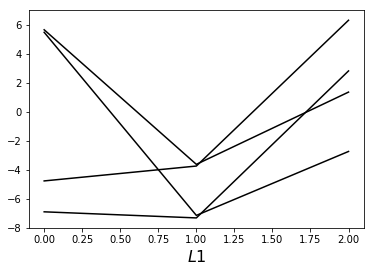

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

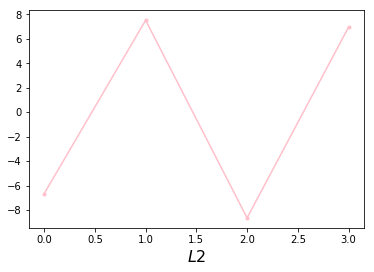

In [18]:
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='pink')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()

In [19]:
print("Output After Training (根據 L1):")
print(l1)

Output After Training (根據 L1):
[[7.96059875e-01 6.08981075e-02 9.43967487e-01 9.98208427e-01]
 [9.41179385e-02 5.08232892e-05 1.09781633e-02 9.29522820e-01]
 [9.99113675e-01 9.40212089e-01 1.66284297e-02 8.25207527e-01]
 [9.67746137e-01 1.21754779e-02 1.11412938e-05 1.00520891e-01]]


In [20]:
print("Output After Training (根據 L2):")
print(l2)

Output After Training (根據 L2):
[[0.00228741]
 [0.9967708 ]
 [0.99750039]
 [0.0034715 ]]
